In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import customized_fcn as fcn
from scipy.optimize import Bounds,minimize,differential_evolution
from matplotlib import pyplot as plt

## set up parameter optimization problem

In [2]:
def cost_fcn_LogisticGrowth(theta, exp_data_files, alpha):
    '''cost function for logistic growth fitting''' 

    num_species = 1
    
    num_para = num_species**2
    
    r = theta[:num_species]
    
    A = np.array(theta[num_species:num_species + num_para]).reshape(num_species,num_species)
    
    para_dyn_theta = [r, A]
    
    error = 0
    
    for i in range(len(exp_data_files)):
        
        file = exp_data_files[i]
        
        exp_data = pd.read_csv("input_data/" + file, index_col=0)
    
        exp_time = list(exp_data.groupby(by = 'time').mean().index)
        exp_data = exp_data.groupby(by = 'time').mean()
        
        x0 = exp_data['abs'].iloc[0]
        
        x_sim = fcn.sim_TIV_gLV(x0, para_dyn_theta, exp_time)
        
        x_exp = exp_data['abs'].to_numpy().reshape(x_sim.shape)

        error = error + np.linalg.norm(x_sim - x_exp, 'fro')
        
    cost = error + alpha*(np.linalg.norm(r) + np.linalg.norm(A.reshape(-1)))
    return cost

In [3]:
## generate random initial parameters using latin hypercube sampling
from scipy.stats import qmc
sampler = qmc.LatinHypercube(d=2)
sample = sampler.random(n=20)

# set lower and upper bounds for initial parameters
l_bounds = [0, -2]
u_bounds = [2, 0]

ini_para = qmc.scale(sample, l_bounds, u_bounds)

In [4]:
num_para_theta = 2

# initialize parameter bounds
bnd = []
for i in range(num_para_theta):
    bnd.append((None,None))
    
# r1 - growth rate must be positive
bnd[0] = (0,None)

# A0_22 - carrying capacity = -r1/A0_22
bnd[1] = (None,0)

In [5]:
# try different weight parameters penalize parameter L2 norm
alpha_vec = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

# empty list to save results
_species_vec = []
_alpha_vec = []
_ini_para_vec = []
_cost_vec = []
_success_vec = []

for species in ['BT', 'BU', 'PV', 'CA', 'CH', 'CS', 'DP', 'EL', 'PC', 'CD']:

    exp_data_files = [species + '_mono.csv']

    for alpha in alpha_vec:

        for i in range(ini_para.shape[0]):
            
            print('species=' + species + ', alpha=' + str(alpha) + ', ini para=' + str(i))

            theta0 = list(ini_para[i,:])

            min_sol = minimize(cost_fcn_LogisticGrowth, theta0, 
                               bounds = bnd, 
                               method = 'trust-constr', 
                               options = {'maxiter':300, 'disp':True, 'verbose':0},
                               args = (exp_data_files, alpha))

            
            _species_vec.append(species)
            _alpha_vec.append(alpha)
            _ini_para_vec.append(theta0)
            _cost_vec.append(min_sol.fun)
            _success_vec.append(min_sol.success)

species=BT, alpha=0.001, ini para=0
`gtol` termination condition is satisfied.
Number of iterations: 33, function evaluations: 87, CG iterations: 47, optimality: 9.04e-09, constraint violation: 0.00e+00, execution time: 0.21 s.
species=BT, alpha=0.001, ini para=1
`xtol` termination condition is satisfied.
Number of iterations: 92, function evaluations: 249, CG iterations: 137, optimality: 6.31e-07, constraint violation: 0.00e+00, execution time: 0.56 s.
species=BT, alpha=0.001, ini para=2
`gtol` termination condition is satisfied.
Number of iterations: 40, function evaluations: 105, CG iterations: 57, optimality: 9.73e-09, constraint violation: 0.00e+00, execution time: 0.25 s.
species=BT, alpha=0.001, ini para=3
`xtol` termination condition is satisfied.
Number of iterations: 92, function evaluations: 216, CG iterations: 136, optimality: 6.28e-07, constraint violation: 0.00e+00, execution time: 0.52 s.
species=BT, alpha=0.001, ini para=4
`gtol` termination condition is satisfied.
Numb

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`gtol` termination condition is satisfied.
Number of iterations: 35, function evaluations: 96, CG iterations: 48, optimality: 3.35e-09, constraint violation: 0.00e+00, execution time: 0.22 s.
species=BT, alpha=0.003, ini para=6
`gtol` termination condition is satisfied.
Number of iterations: 32, function evaluations: 87, CG iterations: 45, optimality: 4.24e-09, constraint violation: 0.00e+00, execution time: 0.19 s.
species=BT, alpha=0.003, ini para=7
`xtol` termination condition is satisfied.
Number of iterations: 81, function evaluations: 222, CG iterations: 124, optimality: 7.19e-07, constraint violation: 0.00e+00, execution time: 0.46 s.
species=BT, alpha=0.003, ini para=8
The maximum number of function evaluations is exceeded.
Number of iterations: 300, function evaluations: 900, CG iterations: 301, optimality: 2.44e-01, constraint violation: 0.00e+00, execution time:  2.0 s.
species=BT, alpha=0.003, ini para=9
`xtol` termination condition is satisfied.
Number of iterations: 84, f

`gtol` termination condition is satisfied.
Number of iterations: 38, function evaluations: 99, CG iterations: 53, optimality: 3.14e-09, constraint violation: 0.00e+00, execution time: 0.21 s.
species=BT, alpha=0.03, ini para=2
The maximum number of function evaluations is exceeded.
Number of iterations: 300, function evaluations: 900, CG iterations: 308, optimality: 1.42e-01, constraint violation: 0.00e+00, execution time:  2.0 s.
species=BT, alpha=0.03, ini para=3
`gtol` termination condition is satisfied.
Number of iterations: 40, function evaluations: 117, CG iterations: 58, optimality: 3.66e-09, constraint violation: 0.00e+00, execution time: 0.24 s.
species=BT, alpha=0.03, ini para=4
`xtol` termination condition is satisfied.
Number of iterations: 92, function evaluations: 258, CG iterations: 138, optimality: 5.99e-07, constraint violation: 0.00e+00, execution time: 0.49 s.
species=BT, alpha=0.03, ini para=5
`gtol` termination condition is satisfied.
Number of iterations: 31, func

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`gtol` termination condition is satisfied.
Number of iterations: 38, function evaluations: 102, CG iterations: 50, optimality: 3.34e-09, constraint violation: 0.00e+00, execution time: 0.21 s.
species=BT, alpha=0.03, ini para=19
`xtol` termination condition is satisfied.
Number of iterations: 88, function evaluations: 243, CG iterations: 131, optimality: 6.38e-07, constraint violation: 0.00e+00, execution time: 0.55 s.
species=BT, alpha=0.1, ini para=0
`xtol` termination condition is satisfied.
Number of iterations: 88, function evaluations: 219, CG iterations: 132, optimality: 6.15e-07, constraint violation: 0.00e+00, execution time: 0.51 s.
species=BT, alpha=0.1, ini para=1
`xtol` termination condition is satisfied.
Number of iterations: 85, function evaluations: 228, CG iterations: 126, optimality: 6.56e-07, constraint violation: 0.00e+00, execution time:  0.5 s.
species=BT, alpha=0.1, ini para=2
`gtol` termination condition is satisfied.
Number of iterations: 35, function evaluatio

`gtol` termination condition is satisfied.
Number of iterations: 32, function evaluations: 81, CG iterations: 44, optimality: 9.98e-09, constraint violation: 0.00e+00, execution time: 0.17 s.
species=BT, alpha=0.3, ini para=15
`gtol` termination condition is satisfied.
Number of iterations: 32, function evaluations: 78, CG iterations: 39, optimality: 9.19e-09, constraint violation: 0.00e+00, execution time: 0.16 s.
species=BT, alpha=0.3, ini para=16


/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 82, function evaluations: 231, CG iterations: 121, optimality: 5.96e-07, constraint violation: 0.00e+00, execution time: 0.45 s.
species=BT, alpha=0.3, ini para=17
`xtol` termination condition is satisfied.
Number of iterations: 144, function evaluations: 381, CG iterations: 183, optimality: 6.30e-07, constraint violation: 0.00e+00, execution time: 0.79 s.
species=BT, alpha=0.3, ini para=18
`gtol` termination condition is satisfied.
Number of iterations: 33, function evaluations: 81, CG iterations: 43, optimality: 7.84e-09, constraint violation: 0.00e+00, execution time: 0.17 s.
species=BT, alpha=0.3, ini para=19
`xtol` termination condition is satisfied.
Number of iterations: 82, function evaluations: 216, CG iterations: 126, optimality: 8.68e-07, constraint violation: 0.00e+00, execution time: 0.44 s.
species=BT, alpha=1, ini para=0


/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 79, function evaluations: 198, CG iterations: 115, optimality: 2.16e-07, constraint violation: 0.00e+00, execution time:  0.4 s.
species=BT, alpha=1, ini para=1
`xtol` termination condition is satisfied.
Number of iterations: 66, function evaluations: 120, CG iterations: 96, optimality: 1.05e-07, constraint violation: 0.00e+00, execution time: 0.26 s.
species=BT, alpha=1, ini para=2
`xtol` termination condition is satisfied.
Number of iterations: 67, function evaluations: 120, CG iterations: 103, optimality: 7.51e-08, constraint violation: 0.00e+00, execution time: 0.27 s.
species=BT, alpha=1, ini para=3
`xtol` termination condition is satisfied.
Number of iterations: 73, function evaluations: 150, CG iterations: 115, optimality: 1.45e-07, constraint violation: 0.00e+00, execution time: 0.31 s.
species=BT, alpha=1, ini para=4
`xtol` termination condition is satisfied.
Number of iterations: 68, function evaluations: 126, C

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 79, function evaluations: 174, CG iterations: 102, optimality: 1.66e-07, constraint violation: 0.00e+00, execution time:  0.4 s.
species=BT, alpha=1, ini para=12
`xtol` termination condition is satisfied.
Number of iterations: 53, function evaluations: 66, CG iterations: 79, optimality: 3.00e-08, constraint violation: 0.00e+00, execution time: 0.18 s.
species=BT, alpha=1, ini para=13
`xtol` termination condition is satisfied.
Number of iterations: 72, function evaluations: 150, CG iterations: 106, optimality: 1.76e-07, constraint violation: 0.00e+00, execution time:  0.3 s.
species=BT, alpha=1, ini para=14
`xtol` termination condition is satisfied.
Number of iterations: 85, function evaluations: 216, CG iterations: 133, optimality: 2.13e-07, constraint violation: 0.00e+00, execution time: 0.45 s.
species=BT, alpha=1, ini para=15
`xtol` termination condition is satisfied.
Number of iterations: 79, function evaluations: 174

`gtol` termination condition is satisfied.
Number of iterations: 29, function evaluations: 78, CG iterations: 41, optimality: 8.61e-09, constraint violation: 0.00e+00, execution time: 0.16 s.
species=BT, alpha=10, ini para=9
`gtol` termination condition is satisfied.
Number of iterations: 17, function evaluations: 42, CG iterations: 15, optimality: 1.61e-10, constraint violation: 0.00e+00, execution time: 0.08 s.
species=BT, alpha=10, ini para=10
`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 30, CG iterations: 11, optimality: 6.39e-09, constraint violation: 0.00e+00, execution time: 0.057 s.
species=BT, alpha=10, ini para=11
`gtol` termination condition is satisfied.
Number of iterations: 15, function evaluations: 36, CG iterations: 13, optimality: 5.07e-09, constraint violation: 0.00e+00, execution time: 0.071 s.
species=BT, alpha=10, ini para=12
`gtol` termination condition is satisfied.
Number of iterations: 13, function evaluations: 27, 

`xtol` termination condition is satisfied.
Number of iterations: 72, function evaluations: 159, CG iterations: 105, optimality: 1.46e-07, constraint violation: 0.00e+00, execution time: 0.35 s.
species=BU, alpha=0.003, ini para=5
`xtol` termination condition is satisfied.
Number of iterations: 66, function evaluations: 150, CG iterations: 99, optimality: 2.00e-07, constraint violation: 0.00e+00, execution time: 0.32 s.
species=BU, alpha=0.003, ini para=6
`gtol` termination condition is satisfied.
Number of iterations: 29, function evaluations: 72, CG iterations: 36, optimality: 9.01e-09, constraint violation: 0.00e+00, execution time: 0.16 s.
species=BU, alpha=0.003, ini para=7
`gtol` termination condition is satisfied.
Number of iterations: 21, function evaluations: 45, CG iterations: 24, optimality: 8.11e-09, constraint violation: 0.00e+00, execution time:  0.1 s.
species=BU, alpha=0.003, ini para=8
`xtol` termination condition is satisfied.
Number of iterations: 67, function evaluat

`xtol` termination condition is satisfied.
Number of iterations: 71, function evaluations: 192, CG iterations: 110, optimality: 1.32e-07, constraint violation: 0.00e+00, execution time:  0.4 s.
species=BU, alpha=0.03, ini para=2


/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`gtol` termination condition is satisfied.
Number of iterations: 37, function evaluations: 96, CG iterations: 50, optimality: 1.84e-09, constraint violation: 0.00e+00, execution time: 0.21 s.
species=BU, alpha=0.03, ini para=3
`xtol` termination condition is satisfied.
Number of iterations: 80, function evaluations: 207, CG iterations: 121, optimality: 1.24e-07, constraint violation: 0.00e+00, execution time: 0.68 s.
species=BU, alpha=0.03, ini para=4
`xtol` termination condition is satisfied.
Number of iterations: 75, function evaluations: 198, CG iterations: 111, optimality: 1.48e-07, constraint violation: 0.00e+00, execution time: 0.45 s.
species=BU, alpha=0.03, ini para=5
`xtol` termination condition is satisfied.
Number of iterations: 64, function evaluations: 138, CG iterations: 98, optimality: 1.85e-07, constraint violation: 0.00e+00, execution time:  0.3 s.
species=BU, alpha=0.03, ini para=6
`xtol` termination condition is satisfied.
Number of iterations: 67, function evaluatio

`xtol` termination condition is satisfied.
Number of iterations: 67, function evaluations: 174, CG iterations: 98, optimality: 1.55e-07, constraint violation: 0.00e+00, execution time: 0.36 s.
species=BU, alpha=0.1, ini para=19
`gtol` termination condition is satisfied.
Number of iterations: 31, function evaluations: 81, CG iterations: 42, optimality: 5.34e-09, constraint violation: 0.00e+00, execution time: 0.17 s.
species=BU, alpha=0.3, ini para=0
`xtol` termination condition is satisfied.
Number of iterations: 69, function evaluations: 159, CG iterations: 100, optimality: 1.41e-07, constraint violation: 0.00e+00, execution time: 0.33 s.
species=BU, alpha=0.3, ini para=1
`xtol` termination condition is satisfied.
Number of iterations: 64, function evaluations: 138, CG iterations: 95, optimality: 9.01e-08, constraint violation: 0.00e+00, execution time: 0.29 s.
species=BU, alpha=0.3, ini para=2
`xtol` termination condition is satisfied.
Number of iterations: 80, function evaluations: 

`xtol` termination condition is satisfied.
Number of iterations: 67, function evaluations: 123, CG iterations: 93, optimality: 2.58e-07, constraint violation: 0.00e+00, execution time: 0.25 s.
species=BU, alpha=1, ini para=16
`xtol` termination condition is satisfied.
Number of iterations: 68, function evaluations: 156, CG iterations: 96, optimality: 2.03e-07, constraint violation: 0.00e+00, execution time: 0.31 s.
species=BU, alpha=1, ini para=17
`xtol` termination condition is satisfied.
Number of iterations: 65, function evaluations: 120, CG iterations: 81, optimality: 8.66e-08, constraint violation: 0.00e+00, execution time: 0.25 s.
species=BU, alpha=1, ini para=18
`xtol` termination condition is satisfied.
Number of iterations: 64, function evaluations: 123, CG iterations: 100, optimality: 1.08e-07, constraint violation: 0.00e+00, execution time: 0.26 s.
species=BU, alpha=1, ini para=19
`xtol` termination condition is satisfied.
Number of iterations: 57, function evaluations: 87, 

`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 30, CG iterations: 11, optimality: 9.95e-09, constraint violation: 0.00e+00, execution time: 0.055 s.
species=BU, alpha=10, ini para=16
`gtol` termination condition is satisfied.
Number of iterations: 21, function evaluations: 51, CG iterations: 18, optimality: 4.84e-09, constraint violation: 0.00e+00, execution time: 0.096 s.
species=BU, alpha=10, ini para=17
`gtol` termination condition is satisfied.
Number of iterations: 10, function evaluations: 24, CG iterations: 9, optimality: 5.87e-09, constraint violation: 0.00e+00, execution time: 0.043 s.
species=BU, alpha=10, ini para=18
`gtol` termination condition is satisfied.
Number of iterations: 22, function evaluations: 57, CG iterations: 19, optimality: 7.15e-09, constraint violation: 0.00e+00, execution time: 0.11 s.
species=BU, alpha=10, ini para=19
`gtol` termination condition is satisfied.
Number of iterations: 17, function evaluations: 39,

`xtol` termination condition is satisfied.
Number of iterations: 70, function evaluations: 177, CG iterations: 111, optimality: 2.36e-07, constraint violation: 0.00e+00, execution time: 0.35 s.
species=PV, alpha=0.003, ini para=13
`xtol` termination condition is satisfied.
Number of iterations: 70, function evaluations: 174, CG iterations: 102, optimality: 1.32e-07, constraint violation: 0.00e+00, execution time: 0.34 s.
species=PV, alpha=0.003, ini para=14
`gtol` termination condition is satisfied.
Number of iterations: 27, function evaluations: 57, CG iterations: 30, optimality: 8.14e-09, constraint violation: 0.00e+00, execution time: 0.12 s.
species=PV, alpha=0.003, ini para=15
`gtol` termination condition is satisfied.
Number of iterations: 34, function evaluations: 84, CG iterations: 50, optimality: 8.49e-09, constraint violation: 0.00e+00, execution time: 0.18 s.
species=PV, alpha=0.003, ini para=16
`xtol` termination condition is satisfied.
Number of iterations: 69, function ev

`xtol` termination condition is satisfied.
Number of iterations: 64, function evaluations: 165, CG iterations: 92, optimality: 1.07e-07, constraint violation: 0.00e+00, execution time: 0.31 s.
species=PV, alpha=0.03, ini para=10
`gtol` termination condition is satisfied.
Number of iterations: 24, function evaluations: 57, CG iterations: 30, optimality: 2.91e-09, constraint violation: 0.00e+00, execution time: 0.12 s.
species=PV, alpha=0.03, ini para=11
`gtol` termination condition is satisfied.
Number of iterations: 25, function evaluations: 54, CG iterations: 32, optimality: 5.52e-09, constraint violation: 0.00e+00, execution time: 0.12 s.
species=PV, alpha=0.03, ini para=12
`xtol` termination condition is satisfied.
Number of iterations: 73, function evaluations: 195, CG iterations: 110, optimality: 1.38e-07, constraint violation: 0.00e+00, execution time: 0.37 s.
species=PV, alpha=0.03, ini para=13
`gtol` termination condition is satisfied.
Number of iterations: 37, function evaluat

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 74, function evaluations: 186, CG iterations: 112, optimality: 1.01e-07, constraint violation: 0.00e+00, execution time: 0.36 s.
species=PV, alpha=0.1, ini para=4
`gtol` termination condition is satisfied.
Number of iterations: 26, function evaluations: 63, CG iterations: 33, optimality: 6.22e-09, constraint violation: 0.00e+00, execution time: 0.13 s.
species=PV, alpha=0.1, ini para=5
`xtol` termination condition is satisfied.
Number of iterations: 65, function evaluations: 150, CG iterations: 98, optimality: 1.42e-07, constraint violation: 0.00e+00, execution time: 0.29 s.
species=PV, alpha=0.1, ini para=6
`gtol` termination condition is satisfied.
Number of iterations: 23, function evaluations: 51, CG iterations: 28, optimality: 3.64e-09, constraint violation: 0.00e+00, execution time: 0.11 s.
species=PV, alpha=0.1, ini para=7
`xtol` termination condition is satisfied.
Number of iterations: 63, function evaluations: 16

`xtol` termination condition is satisfied.
Number of iterations: 79, function evaluations: 174, CG iterations: 120, optimality: 6.88e-08, constraint violation: 0.00e+00, execution time: 0.34 s.
species=PV, alpha=1, ini para=1
`xtol` termination condition is satisfied.
Number of iterations: 60, function evaluations: 102, CG iterations: 90, optimality: 8.14e-08, constraint violation: 0.00e+00, execution time: 0.21 s.
species=PV, alpha=1, ini para=2
`xtol` termination condition is satisfied.
Number of iterations: 78, function evaluations: 153, CG iterations: 109, optimality: 4.30e-08, constraint violation: 0.00e+00, execution time:  0.3 s.
species=PV, alpha=1, ini para=3


/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 77, function evaluations: 141, CG iterations: 127, optimality: 5.50e-08, constraint violation: 0.00e+00, execution time: 0.31 s.
species=PV, alpha=1, ini para=4
`xtol` termination condition is satisfied.
Number of iterations: 74, function evaluations: 147, CG iterations: 117, optimality: 5.20e-08, constraint violation: 0.00e+00, execution time: 0.33 s.
species=PV, alpha=1, ini para=5
`xtol` termination condition is satisfied.
Number of iterations: 75, function evaluations: 162, CG iterations: 117, optimality: 5.79e-08, constraint violation: 0.00e+00, execution time: 0.33 s.
species=PV, alpha=1, ini para=6
`xtol` termination condition is satisfied.
Number of iterations: 83, function evaluations: 189, CG iterations: 127, optimality: 4.69e-08, constraint violation: 0.00e+00, execution time: 0.37 s.
species=PV, alpha=1, ini para=7
`xtol` termination condition is satisfied.
Number of iterations: 67, function evaluations: 114, 

`gtol` termination condition is satisfied.
Number of iterations: 11, function evaluations: 24, CG iterations: 8, optimality: 7.09e-09, constraint violation: 0.00e+00, execution time: 0.045 s.
species=PV, alpha=10, ini para=4
`gtol` termination condition is satisfied.
Number of iterations: 13, function evaluations: 27, CG iterations: 9, optimality: 7.05e-09, constraint violation: 0.00e+00, execution time: 0.052 s.
species=PV, alpha=10, ini para=5
`gtol` termination condition is satisfied.
Number of iterations: 16, function evaluations: 36, CG iterations: 13, optimality: 1.52e-09, constraint violation: 0.00e+00, execution time: 0.07 s.
species=PV, alpha=10, ini para=6
`gtol` termination condition is satisfied.
Number of iterations: 20, function evaluations: 48, CG iterations: 18, optimality: 1.61e-09, constraint violation: 0.00e+00, execution time: 0.096 s.
species=PV, alpha=10, ini para=7
`gtol` termination condition is satisfied.
Number of iterations: 17, function evaluations: 42, CG i

`xtol` termination condition is satisfied.
Number of iterations: 81, function evaluations: 222, CG iterations: 117, optimality: 1.03e-07, constraint violation: 0.00e+00, execution time: 0.43 s.
species=CA, alpha=0.003, ini para=0
`xtol` termination condition is satisfied.
Number of iterations: 90, function evaluations: 207, CG iterations: 117, optimality: 1.74e-07, constraint violation: 0.00e+00, execution time: 0.42 s.
species=CA, alpha=0.003, ini para=1
`xtol` termination condition is satisfied.
Number of iterations: 69, function evaluations: 150, CG iterations: 97, optimality: 1.84e-07, constraint violation: 0.00e+00, execution time: 0.29 s.
species=CA, alpha=0.003, ini para=2
`xtol` termination condition is satisfied.
Number of iterations: 71, function evaluations: 144, CG iterations: 110, optimality: 9.18e-08, constraint violation: 0.00e+00, execution time:  0.3 s.
species=CA, alpha=0.003, ini para=3
`xtol` termination condition is satisfied.
Number of iterations: 68, function eva

`xtol` termination condition is satisfied.
Number of iterations: 80, function evaluations: 195, CG iterations: 120, optimality: 5.20e-08, constraint violation: 0.00e+00, execution time: 0.38 s.
species=CA, alpha=0.01, ini para=16
`xtol` termination condition is satisfied.
Number of iterations: 72, function evaluations: 141, CG iterations: 116, optimality: 1.57e-08, constraint violation: 0.00e+00, execution time:  0.3 s.
species=CA, alpha=0.01, ini para=17
`xtol` termination condition is satisfied.
Number of iterations: 72, function evaluations: 159, CG iterations: 110, optimality: 1.17e-07, constraint violation: 0.00e+00, execution time:  0.3 s.
species=CA, alpha=0.01, ini para=18
`gtol` termination condition is satisfied.
Number of iterations: 37, function evaluations: 90, CG iterations: 45, optimality: 5.03e-09, constraint violation: 0.00e+00, execution time: 0.18 s.
species=CA, alpha=0.01, ini para=19
`gtol` termination condition is satisfied.
Number of iterations: 37, function eval

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`gtol` termination condition is satisfied.
Number of iterations: 40, function evaluations: 117, CG iterations: 58, optimality: 5.61e-09, constraint violation: 0.00e+00, execution time: 0.23 s.
species=CA, alpha=0.1, ini para=3
`gtol` termination condition is satisfied.
Number of iterations: 31, function evaluations: 72, CG iterations: 36, optimality: 9.72e-09, constraint violation: 0.00e+00, execution time: 0.15 s.
species=CA, alpha=0.1, ini para=4
`gtol` termination condition is satisfied.
Number of iterations: 26, function evaluations: 60, CG iterations: 30, optimality: 8.91e-09, constraint violation: 0.00e+00, execution time: 0.12 s.
species=CA, alpha=0.1, ini para=5
`gtol` termination condition is satisfied.
Number of iterations: 24, function evaluations: 60, CG iterations: 27, optimality: 6.02e-09, constraint violation: 0.00e+00, execution time: 0.12 s.
species=CA, alpha=0.1, ini para=6
`gtol` termination condition is satisfied.
Number of iterations: 24, function evaluations: 51, 

`gtol` termination condition is satisfied.
Number of iterations: 47, function evaluations: 114, CG iterations: 61, optimality: 5.07e-09, constraint violation: 0.00e+00, execution time: 0.23 s.
species=CA, alpha=1, ini para=0
`gtol` termination condition is satisfied.
Number of iterations: 34, function evaluations: 75, CG iterations: 38, optimality: 6.75e-09, constraint violation: 0.00e+00, execution time: 0.15 s.
species=CA, alpha=1, ini para=1
`xtol` termination condition is satisfied.
Number of iterations: 79, function evaluations: 159, CG iterations: 83, optimality: 3.24e-08, constraint violation: 0.00e+00, execution time: 0.31 s.
species=CA, alpha=1, ini para=2
`gtol` termination condition is satisfied.
Number of iterations: 50, function evaluations: 126, CG iterations: 62, optimality: 8.25e-09, constraint violation: 0.00e+00, execution time: 0.26 s.
species=CA, alpha=1, ini para=3
`gtol` termination condition is satisfied.
Number of iterations: 54, function evaluations: 111, CG it

`gtol` termination condition is satisfied.
Number of iterations: 15, function evaluations: 33, CG iterations: 12, optimality: 3.32e-09, constraint violation: 0.00e+00, execution time: 0.072 s.
species=CA, alpha=3, ini para=18
`gtol` termination condition is satisfied.
Number of iterations: 41, function evaluations: 111, CG iterations: 39, optimality: 3.54e-09, constraint violation: 0.00e+00, execution time: 0.23 s.
species=CA, alpha=3, ini para=19
`gtol` termination condition is satisfied.
Number of iterations: 13, function evaluations: 27, CG iterations: 9, optimality: 5.75e-09, constraint violation: 0.00e+00, execution time: 0.054 s.
species=CA, alpha=10, ini para=0
`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 30, CG iterations: 10, optimality: 6.97e-09, constraint violation: 0.00e+00, execution time: 0.063 s.
species=CA, alpha=10, ini para=1
`gtol` termination condition is satisfied.
Number of iterations: 9, function evaluations: 21, CG 

`xtol` termination condition is satisfied.
Number of iterations: 86, function evaluations: 204, CG iterations: 133, optimality: 1.06e-07, constraint violation: 0.00e+00, execution time: 0.41 s.
species=CH, alpha=0.001, ini para=15
`gtol` termination condition is satisfied.
Number of iterations: 58, function evaluations: 159, CG iterations: 73, optimality: 6.10e-09, constraint violation: 0.00e+00, execution time: 0.34 s.
species=CH, alpha=0.001, ini para=16
`gtol` termination condition is satisfied.
Number of iterations: 41, function evaluations: 108, CG iterations: 58, optimality: 8.71e-09, constraint violation: 0.00e+00, execution time: 0.25 s.
species=CH, alpha=0.001, ini para=17
`gtol` termination condition is satisfied.
Number of iterations: 33, function evaluations: 84, CG iterations: 42, optimality: 9.42e-09, constraint violation: 0.00e+00, execution time: 0.18 s.
species=CH, alpha=0.001, ini para=18
`xtol` termination condition is satisfied.
Number of iterations: 73, function ev

`xtol` termination condition is satisfied.
Number of iterations: 70, function evaluations: 174, CG iterations: 108, optimality: 4.75e-08, constraint violation: 0.00e+00, execution time: 0.32 s.
species=CH, alpha=0.01, ini para=11
`xtol` termination condition is satisfied.
Number of iterations: 138, function evaluations: 351, CG iterations: 171, optimality: 1.66e-07, constraint violation: 0.00e+00, execution time: 0.71 s.
species=CH, alpha=0.01, ini para=12
`xtol` termination condition is satisfied.
Number of iterations: 74, function evaluations: 159, CG iterations: 91, optimality: 1.15e-07, constraint violation: 0.00e+00, execution time:  0.3 s.
species=CH, alpha=0.01, ini para=13
`gtol` termination condition is satisfied.
Number of iterations: 30, function evaluations: 75, CG iterations: 38, optimality: 8.03e-09, constraint violation: 0.00e+00, execution time: 0.15 s.
species=CH, alpha=0.01, ini para=14
`xtol` termination condition is satisfied.
Number of iterations: 77, function eval

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 73, function evaluations: 186, CG iterations: 110, optimality: 8.07e-08, constraint violation: 0.00e+00, execution time: 0.35 s.
species=CH, alpha=0.03, ini para=18
`gtol` termination condition is satisfied.
Number of iterations: 41, function evaluations: 108, CG iterations: 55, optimality: 4.73e-09, constraint violation: 0.00e+00, execution time: 0.22 s.
species=CH, alpha=0.03, ini para=19
`xtol` termination condition is satisfied.
Number of iterations: 88, function evaluations: 204, CG iterations: 140, optimality: 1.54e-07, constraint violation: 0.00e+00, execution time: 0.39 s.
species=CH, alpha=0.1, ini para=0
`gtol` termination condition is satisfied.
Number of iterations: 39, function evaluations: 105, CG iterations: 54, optimality: 5.72e-09, constraint violation: 0.00e+00, execution time: 0.21 s.
species=CH, alpha=0.1, ini para=1
`xtol` termination condition is satisfied.
Number of iterations: 78, function evaluati

`xtol` termination condition is satisfied.
Number of iterations: 78, function evaluations: 189, CG iterations: 124, optimality: 8.76e-08, constraint violation: 0.00e+00, execution time: 0.35 s.
species=CH, alpha=0.3, ini para=14
`gtol` termination condition is satisfied.
Number of iterations: 34, function evaluations: 81, CG iterations: 44, optimality: 4.54e-09, constraint violation: 0.00e+00, execution time: 0.17 s.
species=CH, alpha=0.3, ini para=15
`xtol` termination condition is satisfied.
Number of iterations: 84, function evaluations: 216, CG iterations: 138, optimality: 1.58e-07, constraint violation: 0.00e+00, execution time: 0.42 s.
species=CH, alpha=0.3, ini para=16
`xtol` termination condition is satisfied.
Number of iterations: 88, function evaluations: 222, CG iterations: 139, optimality: 1.24e-07, constraint violation: 0.00e+00, execution time: 0.43 s.
species=CH, alpha=0.3, ini para=17
`xtol` termination condition is satisfied.
Number of iterations: 74, function evaluati

`gtol` termination condition is satisfied.
Number of iterations: 23, function evaluations: 60, CG iterations: 24, optimality: 3.56e-09, constraint violation: 0.00e+00, execution time: 0.13 s.
species=CH, alpha=3, ini para=12
`gtol` termination condition is satisfied.
Number of iterations: 30, function evaluations: 63, CG iterations: 33, optimality: 8.20e-09, constraint violation: 0.00e+00, execution time: 0.14 s.
species=CH, alpha=3, ini para=13
`xtol` termination condition is satisfied.
Number of iterations: 64, function evaluations: 111, CG iterations: 65, optimality: 6.28e-08, constraint violation: 0.00e+00, execution time: 0.23 s.
species=CH, alpha=3, ini para=14
`gtol` termination condition is satisfied.
Number of iterations: 16, function evaluations: 36, CG iterations: 13, optimality: 5.80e-09, constraint violation: 0.00e+00, execution time: 0.069 s.
species=CH, alpha=3, ini para=15
`gtol` termination condition is satisfied.
Number of iterations: 18, function evaluations: 45, CG 

The maximum number of function evaluations is exceeded.
Number of iterations: 300, function evaluations: 897, CG iterations: 301, optimality: 9.19e-02, constraint violation: 0.00e+00, execution time:  2.1 s.
species=CS, alpha=0.001, ini para=9
`gtol` termination condition is satisfied.
Number of iterations: 251, function evaluations: 744, CG iterations: 261, optimality: 1.77e-09, constraint violation: 0.00e+00, execution time:  1.7 s.
species=CS, alpha=0.001, ini para=10
`xtol` termination condition is satisfied.
Number of iterations: 82, function evaluations: 222, CG iterations: 128, optimality: 1.25e-07, constraint violation: 0.00e+00, execution time: 0.51 s.
species=CS, alpha=0.001, ini para=11
`gtol` termination condition is satisfied.
Number of iterations: 31, function evaluations: 75, CG iterations: 44, optimality: 3.64e-09, constraint violation: 0.00e+00, execution time: 0.18 s.
species=CS, alpha=0.001, ini para=12
`gtol` termination condition is satisfied.
Number of iterations:

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 91, function evaluations: 261, CG iterations: 144, optimality: 9.06e-08, constraint violation: 0.00e+00, execution time: 0.51 s.
species=CS, alpha=0.01, ini para=3
The maximum number of function evaluations is exceeded.
Number of iterations: 300, function evaluations: 903, CG iterations: 311, optimality: 1.31e-01, constraint violation: 0.00e+00, execution time:  1.9 s.
species=CS, alpha=0.01, ini para=4
`gtol` termination condition is satisfied.
Number of iterations: 49, function evaluations: 144, CG iterations: 73, optimality: 9.54e-09, constraint violation: 0.00e+00, execution time: 0.29 s.
species=CS, alpha=0.01, ini para=5
`gtol` termination condition is satisfied.
Number of iterations: 25, function evaluations: 57, CG iterations: 31, optimality: 5.60e-10, constraint violation: 0.00e+00, execution time: 0.12 s.
species=CS, alpha=0.01, ini para=6
The maximum number of function evaluations is exceeded.
Number of iterati

`gtol` termination condition is satisfied.
Number of iterations: 39, function evaluations: 96, CG iterations: 50, optimality: 7.77e-09, constraint violation: 0.00e+00, execution time: 0.21 s.
species=CS, alpha=0.03, ini para=19
`gtol` termination condition is satisfied.
Number of iterations: 28, function evaluations: 66, CG iterations: 35, optimality: 6.49e-09, constraint violation: 0.00e+00, execution time: 0.14 s.
species=CS, alpha=0.1, ini para=0
`xtol` termination condition is satisfied.
Number of iterations: 80, function evaluations: 210, CG iterations: 119, optimality: 1.22e-07, constraint violation: 0.00e+00, execution time: 0.43 s.
species=CS, alpha=0.1, ini para=1
`gtol` termination condition is satisfied.
Number of iterations: 35, function evaluations: 84, CG iterations: 45, optimality: 3.89e-09, constraint violation: 0.00e+00, execution time: 0.18 s.
species=CS, alpha=0.1, ini para=2
`xtol` termination condition is satisfied.
Number of iterations: 91, function evaluations: 2

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 75, function evaluations: 186, CG iterations: 115, optimality: 8.07e-08, constraint violation: 0.00e+00, execution time: 0.36 s.
species=CS, alpha=0.1, ini para=4
`gtol` termination condition is satisfied.
Number of iterations: 27, function evaluations: 69, CG iterations: 37, optimality: 7.92e-09, constraint violation: 0.00e+00, execution time: 0.14 s.
species=CS, alpha=0.1, ini para=5
`xtol` termination condition is satisfied.
Number of iterations: 65, function evaluations: 150, CG iterations: 100, optimality: 6.83e-08, constraint violation: 0.00e+00, execution time: 0.29 s.
species=CS, alpha=0.1, ini para=6
`xtol` termination condition is satisfied.
Number of iterations: 76, function evaluations: 159, CG iterations: 114, optimality: 1.27e-07, constraint violation: 0.00e+00, execution time: 0.32 s.
species=CS, alpha=0.1, ini para=7
`gtol` termination condition is satisfied.
Number of iterations: 44, function evaluations:

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 72, function evaluations: 183, CG iterations: 109, optimality: 1.25e-07, constraint violation: 0.00e+00, execution time: 0.36 s.
species=CS, alpha=0.1, ini para=17
`gtol` termination condition is satisfied.
Number of iterations: 40, function evaluations: 105, CG iterations: 45, optimality: 5.63e-09, constraint violation: 0.00e+00, execution time: 0.22 s.
species=CS, alpha=0.1, ini para=18
`xtol` termination condition is satisfied.
Number of iterations: 73, function evaluations: 165, CG iterations: 112, optimality: 7.95e-08, constraint violation: 0.00e+00, execution time: 0.33 s.
species=CS, alpha=0.1, ini para=19
`xtol` termination condition is satisfied.
Number of iterations: 75, function evaluations: 189, CG iterations: 120, optimality: 1.19e-07, constraint violation: 0.00e+00, execution time: 0.37 s.
species=CS, alpha=0.3, ini para=0
`xtol` termination condition is satisfied.
Number of iterations: 270, function evaluat

`gtol` termination condition is satisfied.
Number of iterations: 30, function evaluations: 69, CG iterations: 35, optimality: 7.35e-09, constraint violation: 0.00e+00, execution time: 0.14 s.
species=CS, alpha=1, ini para=14
`gtol` termination condition is satisfied.
Number of iterations: 38, function evaluations: 105, CG iterations: 52, optimality: 2.74e-09, constraint violation: 0.00e+00, execution time: 0.21 s.
species=CS, alpha=1, ini para=15


/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`gtol` termination condition is satisfied.
Number of iterations: 45, function evaluations: 114, CG iterations: 59, optimality: 2.68e-09, constraint violation: 0.00e+00, execution time: 0.23 s.
species=CS, alpha=1, ini para=16
`gtol` termination condition is satisfied.
Number of iterations: 44, function evaluations: 114, CG iterations: 52, optimality: 3.60e-10, constraint violation: 0.00e+00, execution time: 0.24 s.
species=CS, alpha=1, ini para=17
`gtol` termination condition is satisfied.
Number of iterations: 39, function evaluations: 96, CG iterations: 46, optimality: 6.98e-09, constraint violation: 0.00e+00, execution time:  0.2 s.
species=CS, alpha=1, ini para=18
`gtol` termination condition is satisfied.
Number of iterations: 43, function evaluations: 111, CG iterations: 59, optimality: 4.30e-09, constraint violation: 0.00e+00, execution time: 0.23 s.
species=CS, alpha=1, ini para=19
`gtol` termination condition is satisfied.
Number of iterations: 27, function evaluations: 54, CG

`gtol` termination condition is satisfied.
Number of iterations: 19, function evaluations: 45, CG iterations: 16, optimality: 3.17e-09, constraint violation: 0.00e+00, execution time: 0.096 s.
species=CS, alpha=10, ini para=15
`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 30, CG iterations: 11, optimality: 6.99e-09, constraint violation: 0.00e+00, execution time: 0.058 s.
species=CS, alpha=10, ini para=16
`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 24, CG iterations: 8, optimality: 3.61e-09, constraint violation: 0.00e+00, execution time: 0.048 s.
species=CS, alpha=10, ini para=17
`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 30, CG iterations: 11, optimality: 1.33e-09, constraint violation: 0.00e+00, execution time: 0.059 s.
species=CS, alpha=10, ini para=18
`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 30

`xtol` termination condition is satisfied.
Number of iterations: 78, function evaluations: 180, CG iterations: 125, optimality: 1.11e-07, constraint violation: 0.00e+00, execution time: 0.35 s.
species=DP, alpha=0.003, ini para=11
`gtol` termination condition is satisfied.
Number of iterations: 23, function evaluations: 54, CG iterations: 25, optimality: 5.01e-09, constraint violation: 0.00e+00, execution time: 0.11 s.
species=DP, alpha=0.003, ini para=12
`gtol` termination condition is satisfied.
Number of iterations: 28, function evaluations: 63, CG iterations: 33, optimality: 1.90e-09, constraint violation: 0.00e+00, execution time: 0.13 s.
species=DP, alpha=0.003, ini para=13
`gtol` termination condition is satisfied.
Number of iterations: 28, function evaluations: 69, CG iterations: 35, optimality: 5.01e-09, constraint violation: 0.00e+00, execution time: 0.14 s.
species=DP, alpha=0.003, ini para=14
`gtol` termination condition is satisfied.
Number of iterations: 21, function eval

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '
/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 87, function evaluations: 228, CG iterations: 134, optimality: 7.51e-08, constraint violation: 0.00e+00, execution time: 0.46 s.
species=DP, alpha=0.01, ini para=3
`gtol` termination condition is satisfied.
Number of iterations: 37, function evaluations: 96, CG iterations: 51, optimality: 6.45e-09, constraint violation: 0.00e+00, execution time:  0.2 s.
species=DP, alpha=0.01, ini para=4
`gtol` termination condition is satisfied.
Number of iterations: 27, function evaluations: 63, CG iterations: 31, optimality: 7.00e-09, constraint violation: 0.00e+00, execution time: 0.13 s.
species=DP, alpha=0.01, ini para=5
`gtol` termination condition is satisfied.
Number of iterations: 27, function evaluations: 57, CG iterations: 32, optimality: 7.96e-09, constraint violation: 0.00e+00, execution time: 0.12 s.
species=DP, alpha=0.01, ini para=6
`gtol` termination condition is satisfied.
Number of iterations: 22, function evaluations:

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`gtol` termination condition is satisfied.
Number of iterations: 41, function evaluations: 111, CG iterations: 52, optimality: 2.51e-09, constraint violation: 0.00e+00, execution time: 0.23 s.
species=DP, alpha=0.03, ini para=2
`gtol` termination condition is satisfied.
Number of iterations: 41, function evaluations: 111, CG iterations: 54, optimality: 5.56e-09, constraint violation: 0.00e+00, execution time: 0.23 s.
species=DP, alpha=0.03, ini para=3
`gtol` termination condition is satisfied.
Number of iterations: 44, function evaluations: 111, CG iterations: 56, optimality: 7.20e-09, constraint violation: 0.00e+00, execution time: 0.26 s.
species=DP, alpha=0.03, ini para=4
`gtol` termination condition is satisfied.
Number of iterations: 23, function evaluations: 57, CG iterations: 29, optimality: 6.09e-09, constraint violation: 0.00e+00, execution time: 0.13 s.
species=DP, alpha=0.03, ini para=5
`gtol` termination condition is satisfied.
Number of iterations: 24, function evaluations

`xtol` termination condition is satisfied.
Number of iterations: 74, function evaluations: 174, CG iterations: 116, optimality: 6.48e-08, constraint violation: 0.00e+00, execution time: 0.34 s.
species=DP, alpha=0.1, ini para=18
`xtol` termination condition is satisfied.
Number of iterations: 75, function evaluations: 156, CG iterations: 114, optimality: 1.11e-07, constraint violation: 0.00e+00, execution time: 0.33 s.
species=DP, alpha=0.1, ini para=19
`xtol` termination condition is satisfied.
Number of iterations: 60, function evaluations: 111, CG iterations: 90, optimality: 1.34e-07, constraint violation: 0.00e+00, execution time: 0.23 s.
species=DP, alpha=0.3, ini para=0
`gtol` termination condition is satisfied.
Number of iterations: 46, function evaluations: 114, CG iterations: 59, optimality: 4.07e-09, constraint violation: 0.00e+00, execution time: 0.23 s.
species=DP, alpha=0.3, ini para=1
`gtol` termination condition is satisfied.
Number of iterations: 40, function evaluation

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`gtol` termination condition is satisfied.
Number of iterations: 45, function evaluations: 111, CG iterations: 55, optimality: 4.49e-10, constraint violation: 0.00e+00, execution time: 0.23 s.
species=DP, alpha=1, ini para=2
`gtol` termination condition is satisfied.
Number of iterations: 39, function evaluations: 93, CG iterations: 43, optimality: 4.01e-09, constraint violation: 0.00e+00, execution time: 0.21 s.
species=DP, alpha=1, ini para=3
`xtol` termination condition is satisfied.
Number of iterations: 77, function evaluations: 153, CG iterations: 79, optimality: 4.04e-08, constraint violation: 0.00e+00, execution time: 0.31 s.
species=DP, alpha=1, ini para=4
`gtol` termination condition is satisfied.
Number of iterations: 35, function evaluations: 78, CG iterations: 39, optimality: 3.09e-09, constraint violation: 0.00e+00, execution time: 0.16 s.
species=DP, alpha=1, ini para=5
`gtol` termination condition is satisfied.
Number of iterations: 27, function evaluations: 66, CG iter

`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 30, CG iterations: 10, optimality: 4.35e-09, constraint violation: 0.00e+00, execution time: 0.059 s.
species=DP, alpha=10, ini para=1
`gtol` termination condition is satisfied.
Number of iterations: 9, function evaluations: 21, CG iterations: 8, optimality: 1.38e-09, constraint violation: 0.00e+00, execution time: 0.041 s.
species=DP, alpha=10, ini para=2
`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 30, CG iterations: 10, optimality: 1.41e-09, constraint violation: 0.00e+00, execution time: 0.059 s.
species=DP, alpha=10, ini para=3
`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 24, CG iterations: 8, optimality: 6.13e-09, constraint violation: 0.00e+00, execution time: 0.046 s.
species=DP, alpha=10, ini para=4
`gtol` termination condition is satisfied.
Number of iterations: 10, function evaluations: 21, CG i

`gtol` termination condition is satisfied.
Number of iterations: 45, function evaluations: 117, CG iterations: 66, optimality: 6.88e-09, constraint violation: 0.00e+00, execution time: 0.27 s.
species=EL, alpha=0.001, ini para=18
`gtol` termination condition is satisfied.
Number of iterations: 31, function evaluations: 78, CG iterations: 40, optimality: 7.11e-09, constraint violation: 0.00e+00, execution time: 0.16 s.
species=EL, alpha=0.001, ini para=19
`xtol` termination condition is satisfied.
Number of iterations: 68, function evaluations: 153, CG iterations: 101, optimality: 1.11e-07, constraint violation: 0.00e+00, execution time: 0.33 s.
species=EL, alpha=0.003, ini para=0
`xtol` termination condition is satisfied.
Number of iterations: 83, function evaluations: 216, CG iterations: 125, optimality: 9.26e-08, constraint violation: 0.00e+00, execution time: 0.43 s.
species=EL, alpha=0.003, ini para=1
`gtol` termination condition is satisfied.
Number of iterations: 30, function eva

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 76, function evaluations: 204, CG iterations: 121, optimality: 1.08e-07, constraint violation: 0.00e+00, execution time:  0.4 s.
species=EL, alpha=0.003, ini para=19
`xtol` termination condition is satisfied.
Number of iterations: 72, function evaluations: 189, CG iterations: 105, optimality: 1.53e-07, constraint violation: 0.00e+00, execution time: 0.36 s.
species=EL, alpha=0.01, ini para=0
`gtol` termination condition is satisfied.
Number of iterations: 36, function evaluations: 87, CG iterations: 44, optimality: 1.84e-09, constraint violation: 0.00e+00, execution time: 0.18 s.
species=EL, alpha=0.01, ini para=1
`gtol` termination condition is satisfied.
Number of iterations: 35, function evaluations: 87, CG iterations: 45, optimality: 1.84e-09, constraint violation: 0.00e+00, execution time: 0.18 s.
species=EL, alpha=0.01, ini para=2
`xtol` termination condition is satisfied.
Number of iterations: 90, function evaluati

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`gtol` termination condition is satisfied.
Number of iterations: 36, function evaluations: 99, CG iterations: 48, optimality: 1.74e-10, constraint violation: 0.00e+00, execution time:  0.2 s.
species=EL, alpha=0.03, ini para=14
`gtol` termination condition is satisfied.
Number of iterations: 34, function evaluations: 90, CG iterations: 45, optimality: 2.41e-09, constraint violation: 0.00e+00, execution time: 0.19 s.
species=EL, alpha=0.03, ini para=15
`gtol` termination condition is satisfied.
Number of iterations: 28, function evaluations: 63, CG iterations: 32, optimality: 2.51e-09, constraint violation: 0.00e+00, execution time: 0.14 s.
species=EL, alpha=0.03, ini para=16
`gtol` termination condition is satisfied.
Number of iterations: 32, function evaluations: 90, CG iterations: 42, optimality: 4.37e-09, constraint violation: 0.00e+00, execution time: 0.18 s.
species=EL, alpha=0.03, ini para=17
`gtol` termination condition is satisfied.
Number of iterations: 34, function evaluation

`xtol` termination condition is satisfied.
Number of iterations: 137, function evaluations: 348, CG iterations: 220, optimality: 1.11e-07, constraint violation: 0.00e+00, execution time:  0.7 s.
species=EL, alpha=0.3, ini para=10
`xtol` termination condition is satisfied.
Number of iterations: 76, function evaluations: 156, CG iterations: 113, optimality: 1.00e-07, constraint violation: 0.00e+00, execution time: 0.31 s.
species=EL, alpha=0.3, ini para=11
`gtol` termination condition is satisfied.
Number of iterations: 38, function evaluations: 84, CG iterations: 48, optimality: 7.13e-09, constraint violation: 0.00e+00, execution time: 0.18 s.
species=EL, alpha=0.3, ini para=12
`xtol` termination condition is satisfied.
Number of iterations: 64, function evaluations: 123, CG iterations: 96, optimality: 1.43e-07, constraint violation: 0.00e+00, execution time: 0.25 s.
species=EL, alpha=0.3, ini para=13
`xtol` termination condition is satisfied.
Number of iterations: 123, function evaluat

`gtol` termination condition is satisfied.
Number of iterations: 18, function evaluations: 42, CG iterations: 15, optimality: 1.85e-09, constraint violation: 0.00e+00, execution time: 0.085 s.
species=EL, alpha=3, ini para=8
`gtol` termination condition is satisfied.
Number of iterations: 112, function evaluations: 324, CG iterations: 180, optimality: 8.47e-10, constraint violation: 0.00e+00, execution time:  0.7 s.
species=EL, alpha=3, ini para=9
`gtol` termination condition is satisfied.
Number of iterations: 24, function evaluations: 57, CG iterations: 29, optimality: 1.77e-09, constraint violation: 0.00e+00, execution time: 0.12 s.
species=EL, alpha=3, ini para=10
`gtol` termination condition is satisfied.
Number of iterations: 21, function evaluations: 51, CG iterations: 18, optimality: 2.10e-09, constraint violation: 0.00e+00, execution time: 0.096 s.
species=EL, alpha=3, ini para=11
`gtol` termination condition is satisfied.
Number of iterations: 24, function evaluations: 60, CG

`xtol` termination condition is satisfied.
Number of iterations: 96, function evaluations: 267, CG iterations: 144, optimality: 2.74e-07, constraint violation: 0.00e+00, execution time: 0.51 s.
species=PC, alpha=0.001, ini para=5
`xtol` termination condition is satisfied.
Number of iterations: 100, function evaluations: 276, CG iterations: 158, optimality: 2.38e-07, constraint violation: 0.00e+00, execution time: 0.54 s.
species=PC, alpha=0.001, ini para=6
`gtol` termination condition is satisfied.
Number of iterations: 36, function evaluations: 96, CG iterations: 49, optimality: 4.85e-09, constraint violation: 0.00e+00, execution time: 0.21 s.
species=PC, alpha=0.001, ini para=7
`xtol` termination condition is satisfied.
Number of iterations: 102, function evaluations: 270, CG iterations: 159, optimality: 1.68e-07, constraint violation: 0.00e+00, execution time: 0.51 s.
species=PC, alpha=0.001, ini para=8
The maximum number of function evaluations is exceeded.
Number of iterations: 30

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 112, function evaluations: 315, CG iterations: 178, optimality: 1.74e-07, constraint violation: 0.00e+00, execution time: 0.63 s.
species=PC, alpha=0.003, ini para=15
`xtol` termination condition is satisfied.
Number of iterations: 107, function evaluations: 312, CG iterations: 170, optimality: 1.11e-07, constraint violation: 0.00e+00, execution time:  0.6 s.
species=PC, alpha=0.003, ini para=16
`xtol` termination condition is satisfied.
Number of iterations: 95, function evaluations: 267, CG iterations: 138, optimality: 2.77e-07, constraint violation: 0.00e+00, execution time:  0.5 s.
species=PC, alpha=0.003, ini para=17
`xtol` termination condition is satisfied.
Number of iterations: 95, function evaluations: 267, CG iterations: 148, optimality: 1.27e-07, constraint violation: 0.00e+00, execution time: 0.51 s.
species=PC, alpha=0.003, ini para=18
`gtol` termination condition is satisfied.
Number of iterations: 34, funct

`xtol` termination condition is satisfied.
Number of iterations: 102, function evaluations: 288, CG iterations: 156, optimality: 2.62e-07, constraint violation: 0.00e+00, execution time: 0.54 s.
species=PC, alpha=0.03, ini para=11
`gtol` termination condition is satisfied.
Number of iterations: 239, function evaluations: 708, CG iterations: 243, optimality: 2.90e-09, constraint violation: 0.00e+00, execution time:  1.6 s.
species=PC, alpha=0.03, ini para=12
`gtol` termination condition is satisfied.
Number of iterations: 27, function evaluations: 69, CG iterations: 34, optimality: 8.54e-09, constraint violation: 0.00e+00, execution time: 0.15 s.
species=PC, alpha=0.03, ini para=13
`gtol` termination condition is satisfied.
Number of iterations: 55, function evaluations: 168, CG iterations: 86, optimality: 5.78e-09, constraint violation: 0.00e+00, execution time: 0.34 s.
species=PC, alpha=0.03, ini para=14


/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`gtol` termination condition is satisfied.
Number of iterations: 43, function evaluations: 126, CG iterations: 59, optimality: 8.19e-09, constraint violation: 0.00e+00, execution time: 0.26 s.
species=PC, alpha=0.03, ini para=15
`xtol` termination condition is satisfied.
Number of iterations: 177, function evaluations: 510, CG iterations: 222, optimality: 2.56e-07, constraint violation: 0.00e+00, execution time:  1.0 s.
species=PC, alpha=0.03, ini para=16
`gtol` termination condition is satisfied.
Number of iterations: 52, function evaluations: 150, CG iterations: 80, optimality: 5.89e-09, constraint violation: 0.00e+00, execution time: 0.31 s.
species=PC, alpha=0.03, ini para=17
`gtol` termination condition is satisfied.
Number of iterations: 41, function evaluations: 111, CG iterations: 59, optimality: 8.48e-09, constraint violation: 0.00e+00, execution time: 0.23 s.
species=PC, alpha=0.03, ini para=18
`gtol` termination condition is satisfied.
Number of iterations: 47, function eval

`xtol` termination condition is satisfied.
Number of iterations: 92, function evaluations: 258, CG iterations: 144, optimality: 3.49e-07, constraint violation: 0.00e+00, execution time: 0.48 s.
species=PC, alpha=0.3, ini para=11
`xtol` termination condition is satisfied.
Number of iterations: 193, function evaluations: 558, CG iterations: 237, optimality: 2.41e-07, constraint violation: 0.00e+00, execution time:  1.4 s.
species=PC, alpha=0.3, ini para=12
`gtol` termination condition is satisfied.
Number of iterations: 27, function evaluations: 72, CG iterations: 38, optimality: 6.47e-09, constraint violation: 0.00e+00, execution time: 0.16 s.
species=PC, alpha=0.3, ini para=13
`xtol` termination condition is satisfied.
Number of iterations: 98, function evaluations: 246, CG iterations: 152, optimality: 3.45e-07, constraint violation: 0.00e+00, execution time: 0.79 s.
species=PC, alpha=0.3, ini para=14
`xtol` termination condition is satisfied.
Number of iterations: 89, function evaluat

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 96, function evaluations: 249, CG iterations: 153, optimality: 4.47e-07, constraint violation: 0.00e+00, execution time: 0.48 s.
species=PC, alpha=1, ini para=11
`xtol` termination condition is satisfied.
Number of iterations: 94, function evaluations: 234, CG iterations: 152, optimality: 2.40e-07, constraint violation: 0.00e+00, execution time: 0.46 s.
species=PC, alpha=1, ini para=12
`xtol` termination condition is satisfied.
Number of iterations: 88, function evaluations: 189, CG iterations: 136, optimality: 1.43e-07, constraint violation: 0.00e+00, execution time: 0.39 s.
species=PC, alpha=1, ini para=13
`xtol` termination condition is satisfied.
Number of iterations: 104, function evaluations: 276, CG iterations: 167, optimality: 5.13e-07, constraint violation: 0.00e+00, execution time: 0.53 s.
species=PC, alpha=1, ini para=14
`xtol` termination condition is satisfied.
Number of iterations: 95, function evaluations: 

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`gtol` termination condition is satisfied.
Number of iterations: 60, function evaluations: 132, CG iterations: 68, optimality: 6.13e-09, constraint violation: 0.00e+00, execution time: 0.28 s.
species=PC, alpha=3, ini para=18
`gtol` termination condition is satisfied.
Number of iterations: 23, function evaluations: 57, CG iterations: 20, optimality: 2.18e-09, constraint violation: 0.00e+00, execution time: 0.11 s.
species=PC, alpha=3, ini para=19
`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 27, CG iterations: 12, optimality: 5.27e-09, constraint violation: 0.00e+00, execution time: 0.052 s.
species=PC, alpha=10, ini para=0
`gtol` termination condition is satisfied.
Number of iterations: 13, function evaluations: 30, CG iterations: 10, optimality: 3.45e-09, constraint violation: 0.00e+00, execution time: 0.062 s.
species=PC, alpha=10, ini para=1
`gtol` termination condition is satisfied.
Number of iterations: 9, function evaluations: 21, CG 

`xtol` termination condition is satisfied.
Number of iterations: 66, function evaluations: 153, CG iterations: 100, optimality: 6.04e-08, constraint violation: 0.00e+00, execution time: 0.32 s.
species=CD, alpha=0.001, ini para=15
`xtol` termination condition is satisfied.
Number of iterations: 85, function evaluations: 192, CG iterations: 129, optimality: 9.61e-08, constraint violation: 0.00e+00, execution time: 0.39 s.
species=CD, alpha=0.001, ini para=16
`xtol` termination condition is satisfied.
Number of iterations: 67, function evaluations: 168, CG iterations: 102, optimality: 7.08e-08, constraint violation: 0.00e+00, execution time: 0.33 s.
species=CD, alpha=0.001, ini para=17
`xtol` termination condition is satisfied.
Number of iterations: 71, function evaluations: 156, CG iterations: 110, optimality: 9.83e-08, constraint violation: 0.00e+00, execution time: 0.32 s.
species=CD, alpha=0.001, ini para=18
`gtol` termination condition is satisfied.
Number of iterations: 42, functio

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`xtol` termination condition is satisfied.
Number of iterations: 72, function evaluations: 192, CG iterations: 101, optimality: 7.25e-08, constraint violation: 0.00e+00, execution time: 0.38 s.
species=CD, alpha=0.003, ini para=4
`gtol` termination condition is satisfied.
Number of iterations: 39, function evaluations: 99, CG iterations: 51, optimality: 8.09e-09, constraint violation: 0.00e+00, execution time: 0.21 s.
species=CD, alpha=0.003, ini para=5
`xtol` termination condition is satisfied.
Number of iterations: 68, function evaluations: 165, CG iterations: 102, optimality: 1.00e-07, constraint violation: 0.00e+00, execution time: 0.33 s.
species=CD, alpha=0.003, ini para=6
`gtol` termination condition is satisfied.
Number of iterations: 25, function evaluations: 54, CG iterations: 29, optimality: 7.08e-09, constraint violation: 0.00e+00, execution time: 0.12 s.
species=CD, alpha=0.003, ini para=7
`xtol` termination condition is satisfied.
Number of iterations: 73, function evalua

`xtol` termination condition is satisfied.
Number of iterations: 74, function evaluations: 168, CG iterations: 111, optimality: 7.57e-08, constraint violation: 0.00e+00, execution time: 0.34 s.
species=CD, alpha=0.03, ini para=0
`gtol` termination condition is satisfied.
Number of iterations: 27, function evaluations: 63, CG iterations: 31, optimality: 6.48e-09, constraint violation: 0.00e+00, execution time: 0.14 s.
species=CD, alpha=0.03, ini para=1
`gtol` termination condition is satisfied.
Number of iterations: 26, function evaluations: 63, CG iterations: 30, optimality: 8.74e-09, constraint violation: 0.00e+00, execution time: 0.14 s.
species=CD, alpha=0.03, ini para=2
`gtol` termination condition is satisfied.
Number of iterations: 41, function evaluations: 105, CG iterations: 56, optimality: 3.29e-09, constraint violation: 0.00e+00, execution time: 0.23 s.
species=CD, alpha=0.03, ini para=3
`gtol` termination condition is satisfied.
Number of iterations: 30, function evaluations

/Users/yili/miniforge3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


`gtol` termination condition is satisfied.
Number of iterations: 26, function evaluations: 63, CG iterations: 30, optimality: 9.29e-09, constraint violation: 0.00e+00, execution time: 0.13 s.
species=CD, alpha=0.1, ini para=11
`gtol` termination condition is satisfied.
Number of iterations: 28, function evaluations: 66, CG iterations: 34, optimality: 9.53e-09, constraint violation: 0.00e+00, execution time: 0.14 s.
species=CD, alpha=0.1, ini para=12
`gtol` termination condition is satisfied.
Number of iterations: 25, function evaluations: 60, CG iterations: 30, optimality: 3.67e-09, constraint violation: 0.00e+00, execution time: 0.13 s.
species=CD, alpha=0.1, ini para=13
`gtol` termination condition is satisfied.
Number of iterations: 23, function evaluations: 54, CG iterations: 27, optimality: 7.02e-09, constraint violation: 0.00e+00, execution time: 0.11 s.
species=CD, alpha=0.1, ini para=14
`gtol` termination condition is satisfied.
Number of iterations: 26, function evaluations: 6

`gtol` termination condition is satisfied.
Number of iterations: 102, function evaluations: 282, CG iterations: 146, optimality: 7.69e-09, constraint violation: 0.00e+00, execution time:  0.6 s.
species=CD, alpha=1, ini para=9
`gtol` termination condition is satisfied.
Number of iterations: 38, function evaluations: 87, CG iterations: 46, optimality: 1.90e-09, constraint violation: 0.00e+00, execution time: 0.18 s.
species=CD, alpha=1, ini para=10
`gtol` termination condition is satisfied.
Number of iterations: 32, function evaluations: 69, CG iterations: 37, optimality: 8.78e-10, constraint violation: 0.00e+00, execution time: 0.15 s.
species=CD, alpha=1, ini para=11
`gtol` termination condition is satisfied.
Number of iterations: 43, function evaluations: 108, CG iterations: 55, optimality: 4.30e-09, constraint violation: 0.00e+00, execution time: 0.23 s.
species=CD, alpha=1, ini para=12
`gtol` termination condition is satisfied.
Number of iterations: 38, function evaluations: 90, CG

`gtol` termination condition is satisfied.
Number of iterations: 13, function evaluations: 27, CG iterations: 9, optimality: 5.83e-09, constraint violation: 0.00e+00, execution time: 0.053 s.
species=CD, alpha=10, ini para=8
`gtol` termination condition is satisfied.
Number of iterations: 32, function evaluations: 84, CG iterations: 42, optimality: 1.37e-09, constraint violation: 0.00e+00, execution time: 0.18 s.
species=CD, alpha=10, ini para=9
`gtol` termination condition is satisfied.
Number of iterations: 16, function evaluations: 36, CG iterations: 14, optimality: 1.58e-09, constraint violation: 0.00e+00, execution time: 0.073 s.
species=CD, alpha=10, ini para=10
`gtol` termination condition is satisfied.
Number of iterations: 14, function evaluations: 30, CG iterations: 11, optimality: 6.34e-09, constraint violation: 0.00e+00, execution time: 0.058 s.
species=CD, alpha=10, ini para=11
`gtol` termination condition is satisfied.
Number of iterations: 15, function evaluations: 33, C

In [6]:
opt_results_df = pd.DataFrame()
opt_results_df['species'] = _species_vec
opt_results_df['alpha'] = _alpha_vec
opt_results_df['ini'] = _ini_para_vec
opt_results_df['cost'] = _cost_vec
opt_results_df['success'] = _success_vec

opt_results_df.to_csv('output_data/optimization_hyper_para.csv')

#### find the optimal hyperparameter

In [7]:
# load optimization results for different L2 norm weights (alpha in alpha_vec) and initial conditions
opt_results_df = pd.read_csv('output_data/optimization_hyper_para.csv', index_col=0)

# only account for cases where optimization is successful, then drop the success indicator column
opt_results_df = opt_results_df[opt_results_df['success']==True]
opt_results_df = opt_results_df.drop(columns=['success'])

# for a fixed partner species and alpha level, find the initial condition that gives the minimum cost
opt_results_min_cost_df = opt_results_df.groupby(['species', 'alpha'], group_keys=False)['cost'].min()
opt_results_min_cost_df = opt_results_min_cost_df.reset_index()

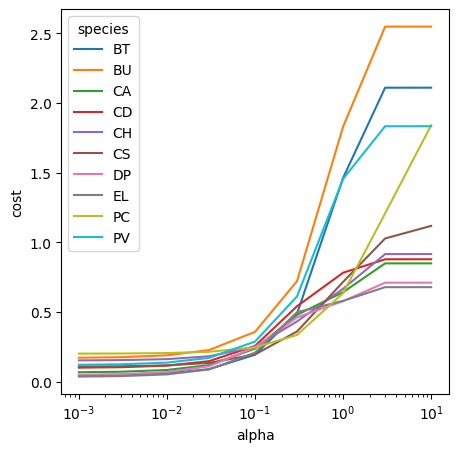

In [8]:
fig, ax = plt.subplots(figsize=(5,5))

sns.lineplot(data=opt_results_min_cost_df, x='alpha', y='cost', hue='species')
ax.set_xscale('log')

plt.savefig('output_data/tune_hyperpara.pdf')

## repeat the above script using optimized hyper-parameter: alpha=0.03

In [9]:
## generate random initial parameters using latin hypercube sampling
from scipy.stats import qmc
sampler = qmc.LatinHypercube(d=2)
sample = sampler.random(n=5)

# set lower and upper bounds for initial parameters
l_bounds = [0, -2]
u_bounds = [2, 0]

ini_para = qmc.scale(sample, l_bounds, u_bounds)

In [10]:
num_para_theta = 2

# initialize bounds
bnd = []
for i in range(num_para_theta):
    bnd.append((None,None))
    
# r1
bnd[0] = (0,None)

# A0_22
bnd[1] = (None,0)

In [11]:
# chosen L2 norm weight
alpha_vec = [0.03]

# empty list to save results
_species_vec = []
_alpha_vec = []
_ini_para_vec = []
_cost_vec = []
_success_vec = []
_opt_para_vec = []

for species in ['BT', 'BU', 'PV', 'CA', 'CH', 'CS', 'DP', 'EL', 'PC', 'CD']:
# for species in ['BT']:

    exp_data_files = [species + '_mono.csv']

    for alpha in alpha_vec:

        for i in range(ini_para.shape[0]):
            
            print('species=' + species + ', alpha=' + str(alpha) + ', ini para=' + str(i))

            theta0 = list(ini_para[i,:])

            min_sol = minimize(cost_fcn_LogisticGrowth, theta0, 
                               bounds = bnd, 
                               method = 'trust-constr', 
                               options = {'maxiter':300, 'disp':True, 'verbose':1},
                               args = (exp_data_files, alpha))

            
            _species_vec.append(species)
            _alpha_vec.append(alpha)
            _ini_para_vec.append(theta0)
            _cost_vec.append(min_sol.fun)
            _success_vec.append(min_sol.success)
            _opt_para_vec.append(min_sol.x)

species=BT, alpha=0.03, ini para=0
`gtol` termination condition is satisfied.
Number of iterations: 35, function evaluations: 90, CG iterations: 48, optimality: 6.41e-09, constraint violation: 0.00e+00, execution time: 0.22 s.
species=BT, alpha=0.03, ini para=1
`xtol` termination condition is satisfied.
Number of iterations: 89, function evaluations: 252, CG iterations: 137, optimality: 9.09e-07, constraint violation: 0.00e+00, execution time:  0.5 s.
species=BT, alpha=0.03, ini para=2
`xtol` termination condition is satisfied.
Number of iterations: 92, function evaluations: 237, CG iterations: 133, optimality: 6.25e-07, constraint violation: 0.00e+00, execution time:  0.5 s.
species=BT, alpha=0.03, ini para=3
The maximum number of function evaluations is exceeded.
Number of iterations: 300, function evaluations: 903, CG iterations: 595, optimality: 5.16e-01, constraint violation: 0.00e+00, execution time:  2.1 s.
species=BT, alpha=0.03, ini para=4
`gtol` termination condition is satis

`xtol` termination condition is satisfied.
Number of iterations: 80, function evaluations: 222, CG iterations: 125, optimality: 1.11e-07, constraint violation: 0.00e+00, execution time: 0.43 s.
species=EL, alpha=0.03, ini para=3
`gtol` termination condition is satisfied.
Number of iterations: 42, function evaluations: 111, CG iterations: 60, optimality: 4.65e-09, constraint violation: 0.00e+00, execution time: 0.23 s.
species=EL, alpha=0.03, ini para=4
`gtol` termination condition is satisfied.
Number of iterations: 31, function evaluations: 78, CG iterations: 41, optimality: 2.02e-09, constraint violation: 0.00e+00, execution time: 0.17 s.
species=PC, alpha=0.03, ini para=0
`gtol` termination condition is satisfied.
Number of iterations: 47, function evaluations: 135, CG iterations: 68, optimality: 6.70e-09, constraint violation: 0.00e+00, execution time: 0.28 s.
species=PC, alpha=0.03, ini para=1
`gtol` termination condition is satisfied.
Number of iterations: 34, function evaluation

In [12]:
opt_results_df = pd.DataFrame()
opt_results_df['species'] = _species_vec
opt_results_df['alpha'] = _alpha_vec
opt_results_df['ini'] = _ini_para_vec
opt_results_df['cost'] = _cost_vec
opt_results_df['success'] = _success_vec
opt_results_df['opt_para'] = _opt_para_vec

opt_results_df = opt_results_df[opt_results_df['success']==True]

opt_results_df.to_csv('output_data/optimized_parameters.csv')

In [13]:
opt_results_df.head()

,species,alpha,ini,cost,success,opt_para
0,BT,0.03,"[0.5694048990358438, -1.5019240695855214]",0.089700,True,"[0.7659433449769144, -0.7187884732397144]"
1,BT,0.03,"[0.8356652431132684, -1.032239269220415]",0.089700,True,"[0.7659420755984121, -0.7187867534322998]"
2,BT,0.03,"[0.09564885558262345, -0.7593561255418244]",0.089700,True,"[0.7659420765256248, -0.7187867585376715]"
4,BT,0.03,"[1.758444052220188, -1.6842761856842]",0.089700,True,"[0.7659433451445803, -0.7187884733950444]"
5,BU,0.03,"[0.5694048990358438, -1.5019240695855214]",0.226719,True,"[0.91645455834275, -0.9644129530373953]"


### extract growth rate and carrying capacity

In [14]:
import copy

_results_df = copy.deepcopy(opt_results_df)
_results_df = _results_df.drop(columns=['cost','success','ini','alpha'])

__results_df = _results_df.groupby(by=['species']).mean().reset_index()

__species_vec = []
__growth_rate_vec = []
__carrying_capacity_vec = []

for i in range(len(__results_df)):
    __species_vec.append(__results_df['species'].iloc[i])
    __growth_rate_vec.append(__results_df['opt_para'].iloc[i][0])
    __carrying_capacity_vec.append(-__results_df['opt_para'].iloc[i][0]/__results_df['opt_para'].iloc[i][1])
    
df_summary = pd.DataFrame()
df_summary['species'] = __species_vec
df_summary['growth_rate'] = __growth_rate_vec
df_summary['carrying_capacity'] = __carrying_capacity_vec

In [15]:
df_summary.to_csv('output_data/mono_growth_rate_carrying_capacity.csv')

### simulate optimal parameter and compare with experimental data

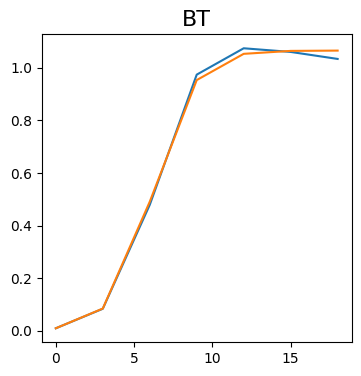

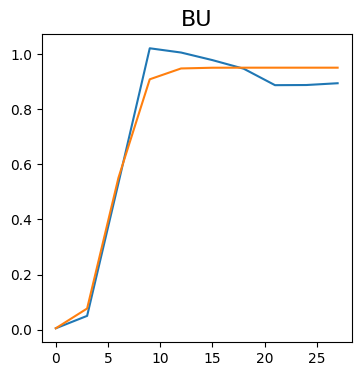

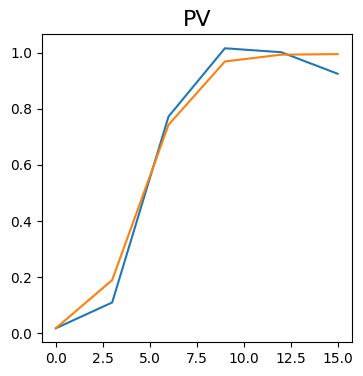

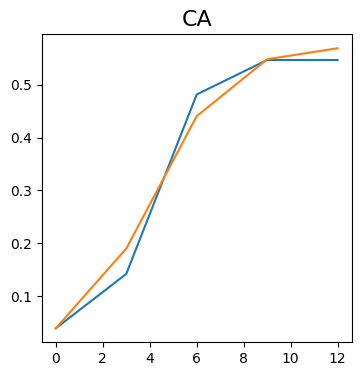

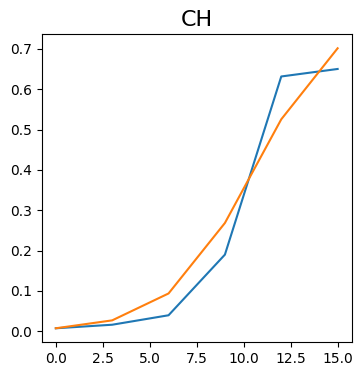

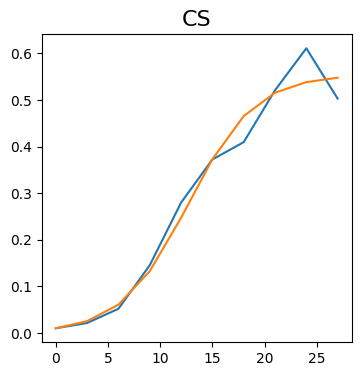

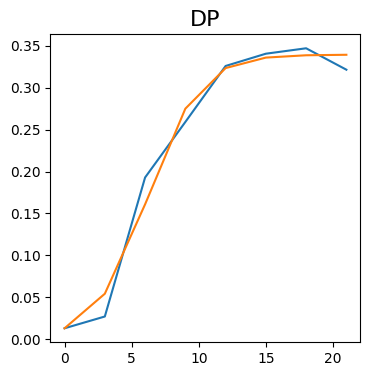

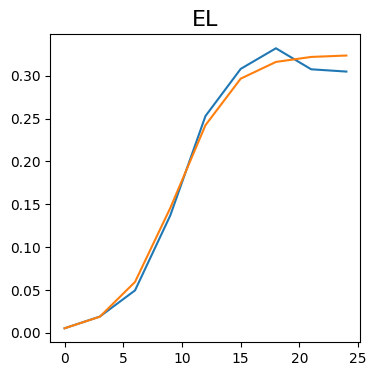

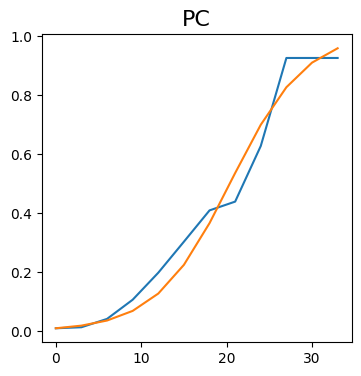

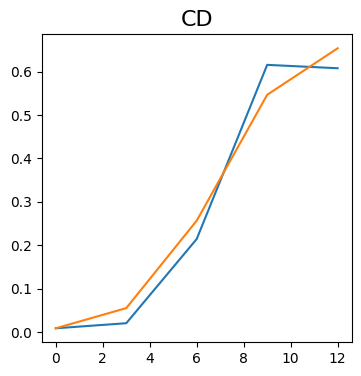

In [16]:
for species in ['BT', 'BU', 'PV', 'CA', 'CH', 'CS', 'DP', 'EL', 'PC', 'CD']:
    
    _opt_para = opt_results_df[opt_results_df['species']==species]['opt_para'].iloc[0]
    
    exp_data_files = 'input_data/' + species + '_mono.csv'
    exp_data = pd.read_csv(exp_data_files, index_col=0)
    
    exp_time = exp_data['time'].to_list()
    
    x0 = exp_data['abs'].iloc[0]
    para_dyn_theta = [np.array(_opt_para[0]).reshape(1), np.array(_opt_para[1]).reshape(1,1)]
    
    x_sim = fcn.sim_TIV_gLV(x0, para_dyn_theta, exp_time)
    
    fig, ax = plt.subplots(figsize=(4,4))
    plt.plot(exp_time, exp_data['abs'])
    plt.plot(exp_time, x_sim)
    plt.title(species, fontsize=16)
    
#     print(np.linalg.norm(x_sim - exp_data['abs'].to_numpy().reshape(10,1), 'fro'))
    plt.savefig('output_data/' + species + '_mono.pdf')